# Setting up the notebook

## Import the packages we need

There are several libraries that have been created that we can use to make our job easier. We can import these libraries, so that we can take advantage of the functionalities they have, without developing the code ourselves.

Importing these packages needs to be done at the **top** of the notebook, before we run any code.

- [`pandas`](https://pandas.pydata.org/) "is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool"

- [`sklearn`](https://scikit-learn.org/) is a library of tools for predictive and descriptive data analysis written in Python

- [`matplotlib`](https://matplotlib.org/) is a library for creating visualizations

- [`seaborn`](https://seaborn.pydata.org/) is a library for creating visualizations, built on top of `matplotlib`

In [1]:
from math import ceil

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [2]:
sns.set()


# Import the Data

In [3]:
## To Load our CSV file into a dataframe
## First we need to provide access to our file

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
## Load csv file into a dataframe 

data_path = "/content/drive/MyDrive/FAI2223_Notebooks/data/spaceship_titanic_dataset.csv"
df = pd.read_csv(data_path)

## Check file loaded
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
## IF you have problems with Google Drive above, try this cell instead.
## Un-comment the lines by removing the "#" character


## Remove the "#" at the start of the lines below:

#data_path = "https://raw.githubusercontent.com/fpontejos/FAI_2223/main/data/spaceship_titanic_dataset.csv"
#df = pd.read_csv(data_path)

#df.head()

# Dataset description

Our dataset was taken from a Kaggle competition called Spaceship Titanic (Howard et al., 2022)<a name="cite1"></a>[<sup>[1]</sup>](#note1)

Given the details of the passengers on board a spaceship:

1. create a predictive model for which passengers were transported to an alternate dimension. 
2. create a descriptive model about the passengers. 

- **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

- **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.

- **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

- **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

- **Destination** - The planet the passenger will be debarking to.

- **Age** - The age of the passenger.

- **VIP** - Whether the passenger has paid for special VIP service during the voyage.

- **RoomService**, **FoodCourt**, **ShoppingMall**, **Spa**, **VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

- **Name** - The first and last names of the passenger.

- **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict

---
<a name="cite-1"></a>1. [^](#cite1) Howard, A., Chow, A., & Holbrook, R. (2022). Spaceship titanic. https://kaggle.com/competitions/spaceship-titanic

# Exploring and Understanding the Data

In [6]:
## Define a function that plots multiple histograms

def plot_multiple_histograms(data, feats, title="Numeric Variables' Histograms"):

    # Prepare figure. Create individual axes where each histogram will be placed
    fig, axes = plt.subplots(2, ceil(len(feats) / 2), figsize=(20, 11))

    # Plot data
    # Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
    for ax, feat in zip(axes.flatten(), feats): # Notice the zip() function and flatten() method
      ax.hist(data[feat])
      ax.set_title(feat)

    # Layout
    # Add a centered title to the figure:
    plt.suptitle(title)

    plt.show()

    return


## Define a function that plots multiple box plots

def plot_multiple_boxplots(data, feats, title="Numeric Variables' Box Plots"):

    # Prepare figure. Create individual axes where each histogram will be placed
    fig, axes = plt.subplots(2, ceil(len(feats) / 2), figsize=(20, 11))

    # Plot data
    # Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
    for ax, feat in zip(axes.flatten(), feats): # Notice the zip() function and flatten() method
      sns.boxplot(x=data[feat], ax=ax)
      ax.set_title(feat)

    # Layout
    # Add a centered title to the figure:
    plt.suptitle(title)

    plt.show()

    return


def plot_corrmatrix(df, feats, method="pearson"):
  # Prepare figure
  fig = plt.figure(figsize=(10, 8))

  # Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
  corr = np.round(df[feats].corr(method=method), decimals=2)

  # Plot heatmap of the correlation matrix
  sns.heatmap(data=corr, annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
              vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

  # Layout
  fig.subplots_adjust(top=0.95)
  fig.suptitle("Correlation Matrix", fontsize=20)

  plt.show()
  return 

## Define a function that plots multiple countplots

def plot_categorical_frequencies(data, feats, 
                             title="Categorical Variables' Counts"):
  
    # Prepare figure. Create individual axes where each histogram will be placed
    fig, axes = plt.subplots(2, ceil(len(feats) / 2), figsize=(20, 11))

    # Plot data
    # Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
    for ax, feat in zip(axes.flatten(), feats): 
        sns.countplot(x=df[feat].astype(object), ax=ax, color='#007acc')

    # Layout
    # Add a centered title to the figure:
    plt.suptitle(title)


    plt.show()

    return



## Insights from previous lab

### We have different kinds of variables

In [7]:
metric_features = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
non_metric_features_all = ["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP"]
non_metric_features = ["HomePlanet", "CryoSleep", "Destination", "VIP"]
target_variable = "Transported"

### We looked at the distributions of their values

![Histograms](https://raw.githubusercontent.com/fpontejos/FAI_2223/main/images/histograms_original.png)

In [8]:
#plot_multiple_histograms(df, metric_features)


Refresher on how to interpret boxplots and histograms:

https://www.open.edu/openlearn/science-maths-technology/mathematics-statistics/interpreting-data-boxplots-and-tables/content-section-2.5

https://statisticsbyjim.com/basics/histograms/


### We have some outliers

![Box Plots](https://raw.githubusercontent.com/fpontejos/FAI_2223/main/images/boxplots_original.png)

In [9]:
#plot_multiple_boxplots(df, metric_features)


### We have some missing values

In [10]:
## Count of missing values
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


### Our values have different magnitudes

In [11]:
df.describe()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


### Some of our features are non-numeric 

In [12]:
df[non_metric_features_all].head(3)

,HomePlanet,CryoSleep,Cabin,Destination,VIP
0,Europa,False,B/0/P,TRAPPIST-1e,False
1,Earth,False,F/0/S,TRAPPIST-1e,False
2,Europa,False,A/0/S,TRAPPIST-1e,True


In [13]:

df[non_metric_features_all].nunique()

HomePlanet        3
CryoSleep         2
Cabin          6560
Destination       3
VIP               2
dtype: int64

In [14]:
df[metric_features].head(3)


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0


## How do we deal with these issues?



# Data Preprocessing



### Missing Values

What should we replace our missing values with?

In [15]:
## Reminder of our missing values
df[metric_features].isna().sum()

Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
dtype: int64

In [16]:
## First we make a copy of our data. Why?

df_original = df.copy()
df_central = df.copy()


#### Measures of Central Tendency: Mean

In [17]:
df_means = df_central[metric_features].mean()
df_means

Age              28.827930
RoomService     224.687617
FoodCourt       458.077203
ShoppingMall    173.729169
Spa             311.138778
VRDeck          304.854791
dtype: float64

#### Measures of Central Tendency: Median

In [18]:
df_medians = df_central[metric_features].median()
df_medians


Age             27.0
RoomService      0.0
FoodCourt        0.0
ShoppingMall     0.0
Spa              0.0
VRDeck           0.0
dtype: float64

#### Which one to use?

[]

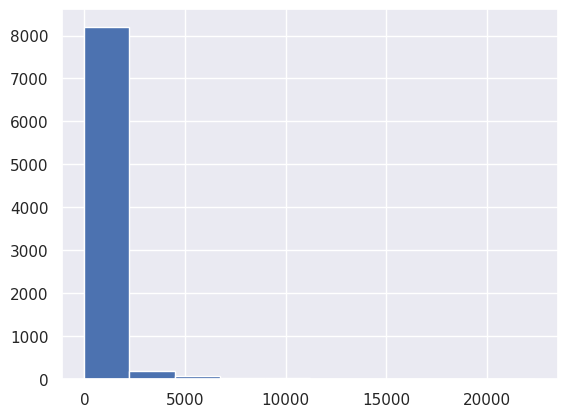

In [19]:
df_central['Spa'].hist(bins=10) ## Test other bin sizes
plt.plot()

In [20]:
df_central.fillna(df_medians, inplace=True)


In [21]:
df_central[metric_features].isna().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

#### What about the non-numeric values?

In [22]:
df_central[non_metric_features].isna().sum()


HomePlanet     201
CryoSleep      217
Destination    182
VIP            203
dtype: int64

In [23]:
#plot_categorical_frequencies(df, non_metric_features)


![Count Plots](https://raw.githubusercontent.com/fpontejos/FAI_2223/main/images/value_counts_original.png)


In [24]:
df_modes = df_central[non_metric_features].mode().loc[0]
df_modes


HomePlanet           Earth
CryoSleep            False
Destination    TRAPPIST-1e
VIP                  False
Name: 0, dtype: object

In [25]:
df_central.fillna(df_modes, inplace=True)


In [26]:
df_central[non_metric_features].isna().sum()


HomePlanet     0
CryoSleep      0
Destination    0
VIP            0
dtype: int64

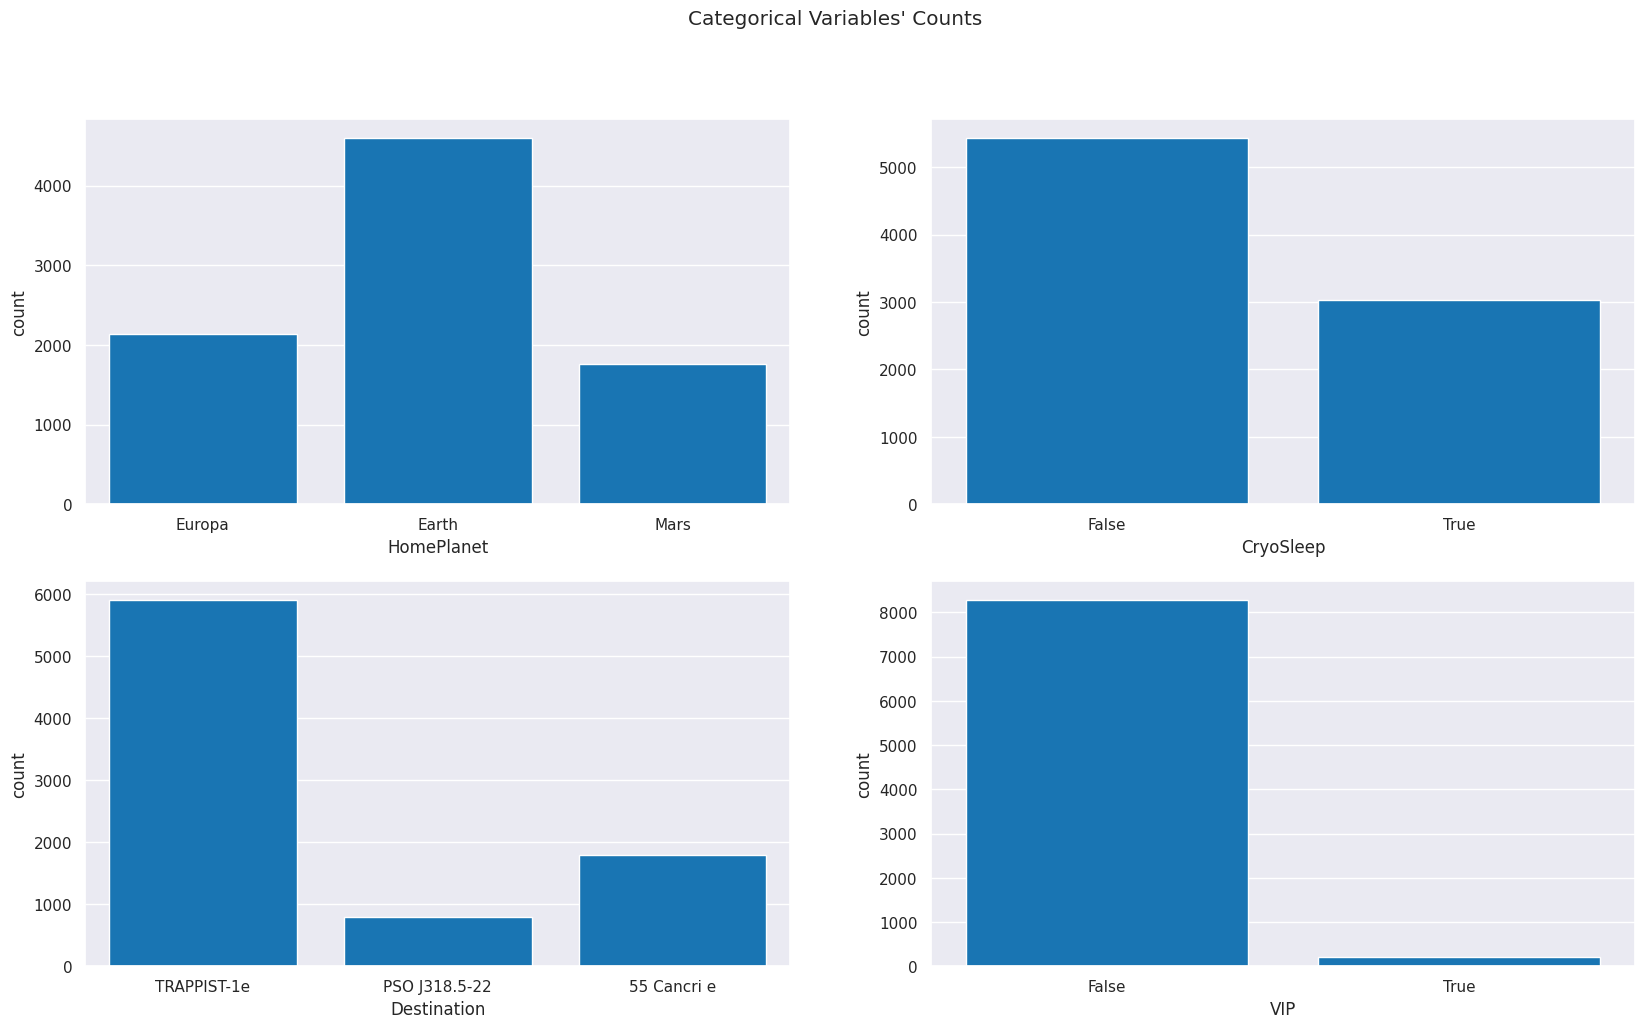

In [27]:
plot_categorical_frequencies(df_central, non_metric_features)


In [28]:
## Once we are happy with our choices, copy it back to df
df = df_central.copy()


#### Questions?

### Treating Outliers

In [29]:
df_outliers = df.copy()

In [30]:
## Uncomment line below to run the plotting code
#plot_multiple_boxplots(df, metric_features)

![Box Plots](https://raw.githubusercontent.com/fpontejos/FAI_2223/main/images/boxplots_original.png)

#### Using Inter-Quartile Range (IQR)

In [31]:
def remove_outliers_iqr(df, feats, qa=0.25, qb=0.75):
  df_ = df.copy()
  q25 = df_[feats].quantile(.25)
  q75 = df_[feats].quantile(.75)
  iqr = (q75 - q25)

  upper_lim = q75 + 1.5 * iqr
  lower_lim = q25 - 1.5 * iqr

  iqr_filters = []
  for f in feats:
      llim = lower_lim[f]
      ulim = upper_lim[f]
      iqr_filters.append(df[f].between(llim, ulim, inclusive='both'))

  iqr_filters = pd.Series(np.all(iqr_filters, 0))
  return df_[iqr_filters]



In [32]:
df_out_iqr = remove_outliers_iqr(df_outliers, metric_features)

print('Percentage of data kept after removing outliers with IQR method:')
print(np.round(df_out_iqr.shape[0] / df_outliers.shape[0], 4))


Percentage of data kept after removing outliers with IQR method:
0.4182


What do you think of this number?

#### Using manual threshold

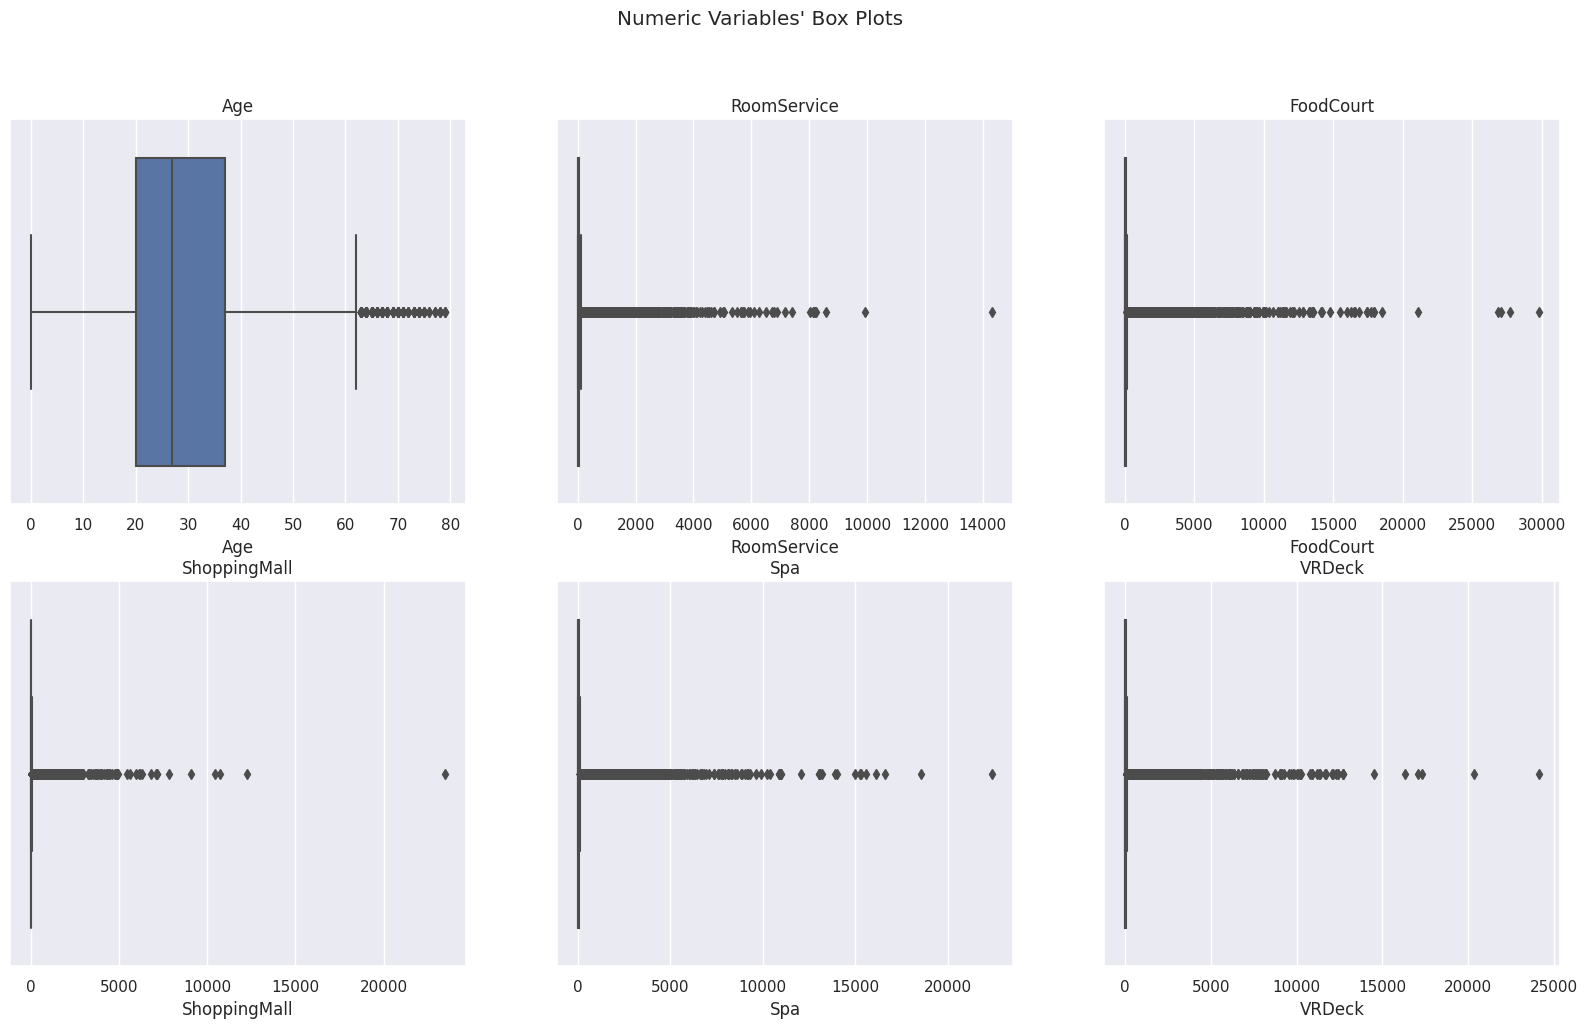

In [33]:
plot_multiple_boxplots(df_outliers, metric_features)


In [34]:
manual_filters = (
    (df_outliers['RoomService']<=8000)
    &
    (df_outliers['FoodCourt']<=20000)
    &
    (df_outliers['ShoppingMall']<=10000)
    &
    (df_outliers['Spa']<=15000)
    &
    (df_outliers['VRDeck']<=14000)

)

df_out_manual = df_outliers[manual_filters]


In [35]:
print('Percentage of data kept after removing outliers with manual method:')
print(np.round(df_out_manual.shape[0] / df_outliers.shape[0], 4))


Percentage of data kept after removing outliers with manual method:
0.9964


What do you think of this number?

In [36]:
df = df_out_manual.copy()

#### Do we have to remove the rows?

We will revisit this question later.


#### Questions?

### Data Standardization

Why do we need to do this?

#### MinMaxScaler()

Transforms values to be between [0,1]

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [37]:
## Again, make a copy first
df_minmax = df.copy()


In [38]:
## Initialize MinMaxScaler
mm_scaler = MinMaxScaler()

## Get the scaled values
mm_scaled_feat = mm_scaler.fit_transform(df_minmax[metric_features])

## Replace original metric_features values with mm_scaled_feat values
df_minmax[metric_features] = mm_scaled_feat

In [39]:
df_minmax.describe().round(2)


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8662.00,8662.00,8662.00,8662.00,8662.00,8662.00
mean,0.36,0.03,0.02,0.02,0.02,0.02
std,0.18,0.08,0.08,0.06,0.07,0.08
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.25,0.00,0.00,0.00,0.00,0.00
50%,0.34,0.00,0.00,0.00,0.00,0.00
75%,0.47,0.01,0.00,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00


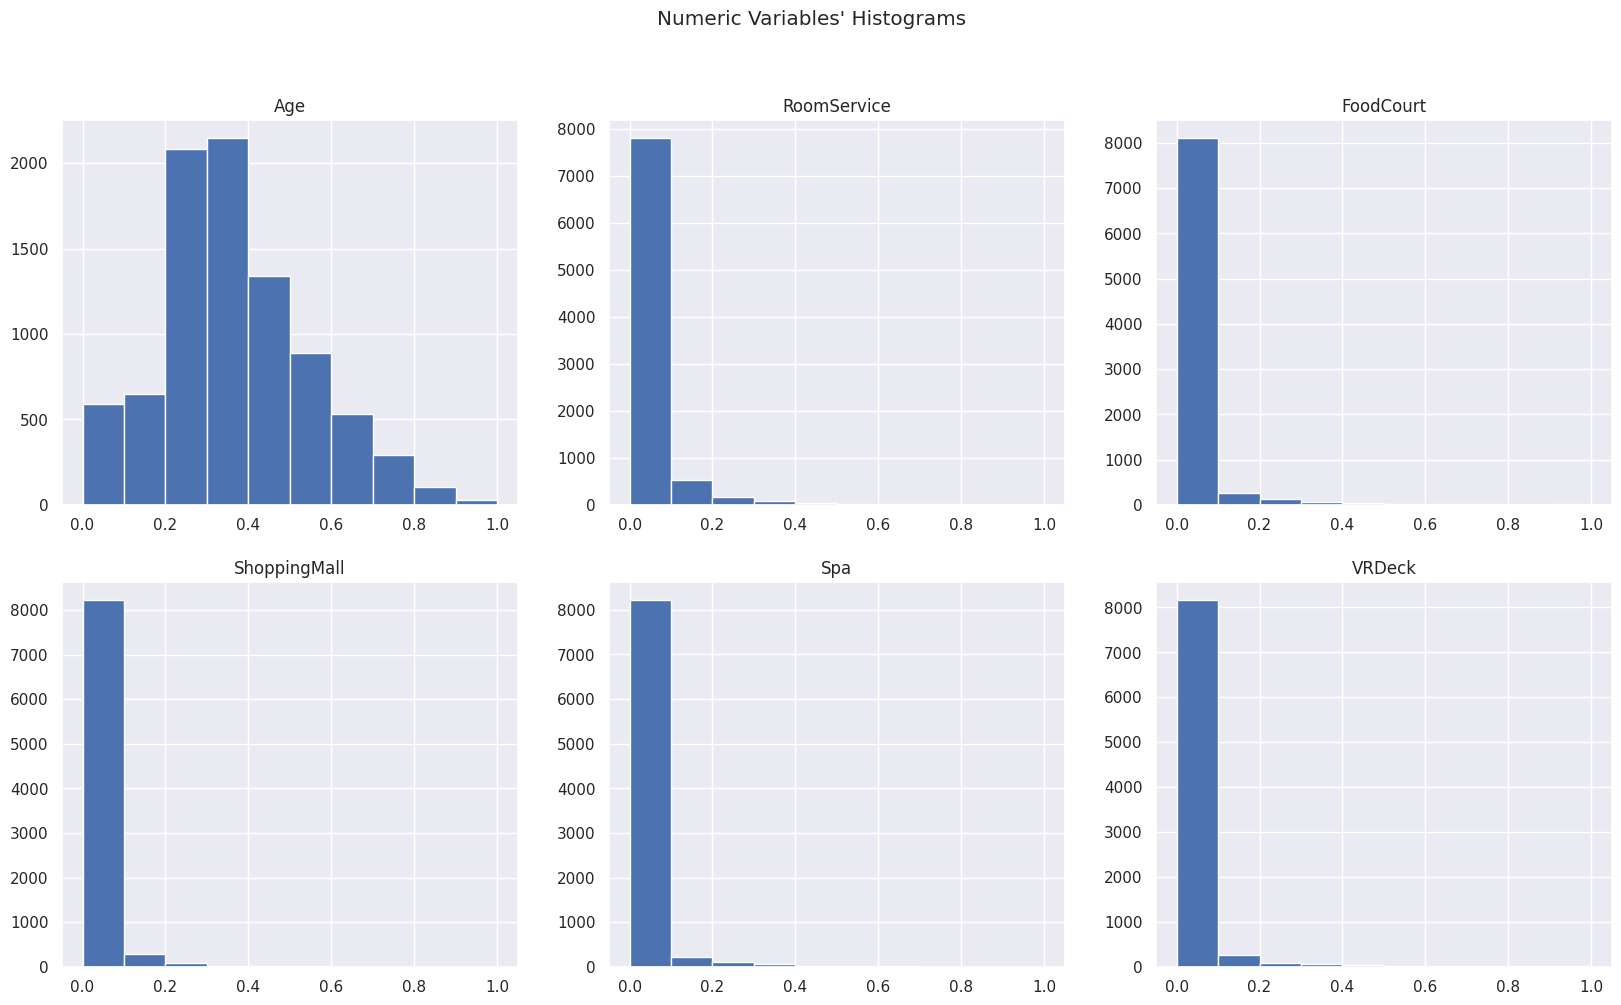

In [40]:
plot_multiple_histograms(df_minmax, metric_features)


#### StandardScaler()

AKA Z-Score Scaling

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [41]:
## Again, make a copy first
df_standard = df.copy()


In [42]:
## Initialize StandardScaler
st_scaler = StandardScaler()

## Get the scaled values
st_scaled_feat = st_scaler.fit_transform(df_standard[metric_features])

## Replace original metric_features values with mm_scaled_feat values
df_standard[metric_features] = st_scaled_feat

In [43]:
## Let's look at the statistics
## Rounded to two digits for easier viewing
df_standard.describe().round(2)


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8662.00,8662.00,8662.00,8662.00,8662.00,8662.00
mean,0.00,-0.00,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.01,-0.36,-0.29,-0.32,-0.29,-0.28
25%,-0.61,-0.36,-0.29,-0.32,-0.29,-0.28
50%,-0.12,-0.36,-0.29,-0.32,-0.29,-0.28
75%,0.57,-0.29,-0.26,-0.28,-0.23,-0.24
max,3.51,12.13,12.43,17.66,14.56,12.18


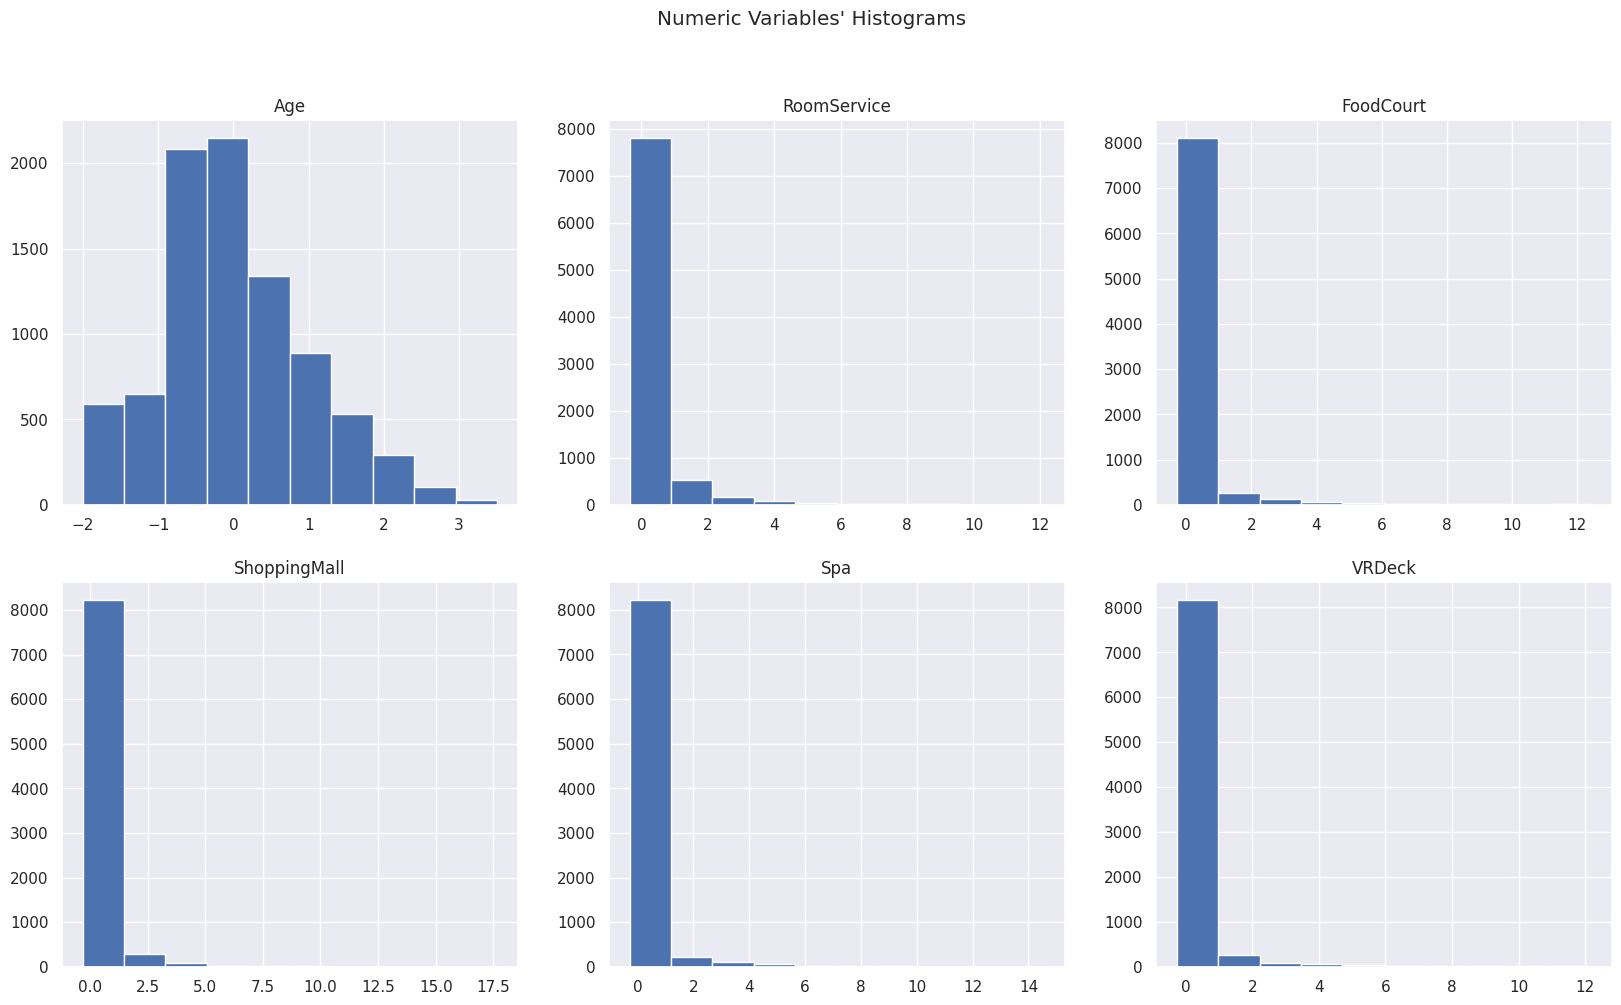

In [44]:
plot_multiple_histograms(df_standard, metric_features)


In [45]:
df = df_standard.copy()


### Feature Selection

#### Redundancy

We've already seen our correlation matrix. This can help us see which variables are highly correlated to each other, which we can then choose to remove.

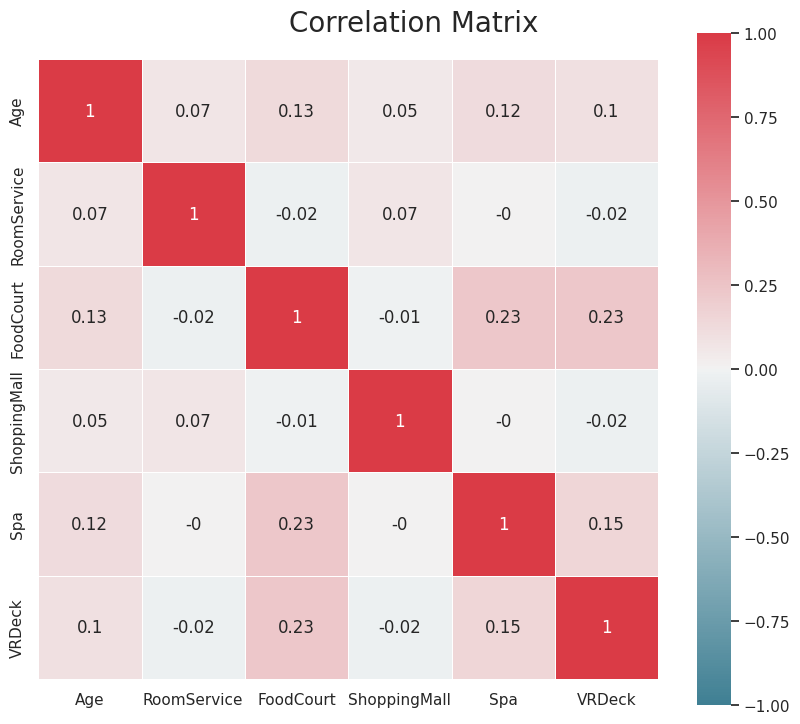

In [46]:
plot_corrmatrix(df, metric_features, method="pearson")

#### Relevancy

We select only the variables that are relevant to the task. For example, if the task is to create a demographic segmentation, then we only keep demographic variables. For now, since we don't have a specific task, we consider all variables to be relevant.


#### Questions?

### Wrap up

#### Redo data exploration

Check if the data looks the way you expect it to. 

- Have you missed some outliers? 
- Are there still missing values?
- Is the data normalized?

This is an iterative process. It is likely you will change your preprocessing steps frequently throughout your group work.

## Next lab

KMeans Clustering

https://www.youtube.com/watch?v=5I3Ei69I40s


Hierarchical Clustering

https://dashee87.github.io/images/hierarch.gif